In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1578,2020-09-09,United Kingdom,352503.0,352560.0,41590.0,41586.0,-57.0,4.0
1579,2020-09-09,Germany,253092.0,253474.0,9335.0,9338.0,-382.0,-3.0
1580,2020-09-09,Iran,392640.0,391112.0,22651.0,22542.0,1528.0,109.0
1581,2020-09-09,Turkey,282775.0,283270.0,6772.0,6782.0,-495.0,-10.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  9244.739102969046
RMSE =  35547.04965668754


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  303.63676563487047
RMSE =  747.2425642178722


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  66067.20666666667
RMSE =  111879.22724345808
-- World performances for deaths --
MAE =  1718.6066666666666
RMSE =  2097.9178805027937


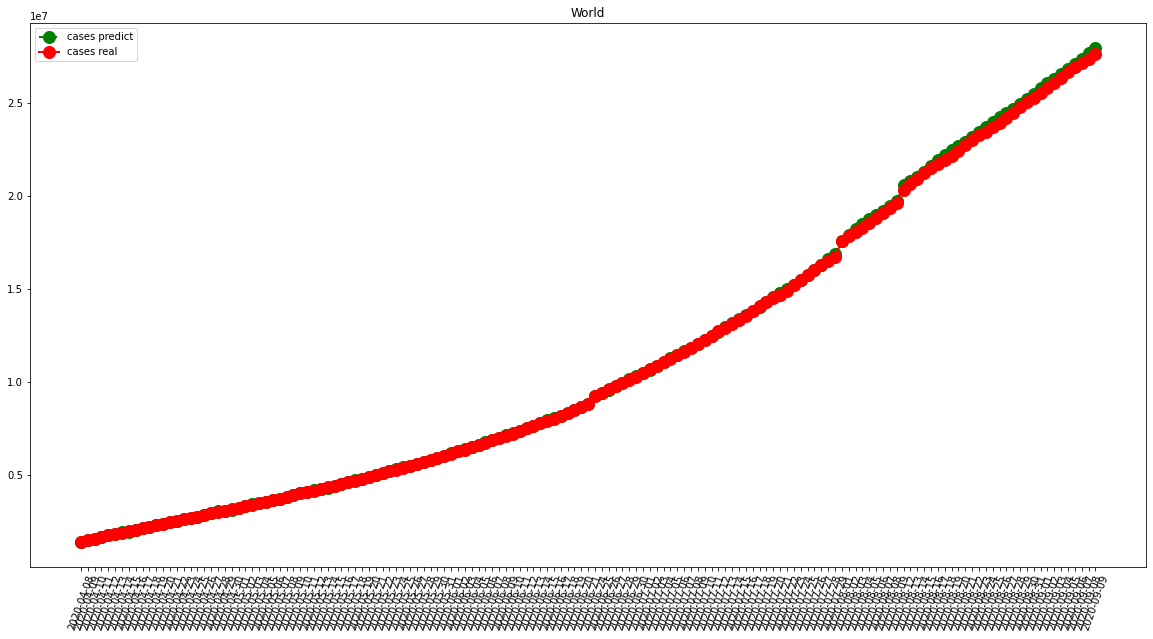

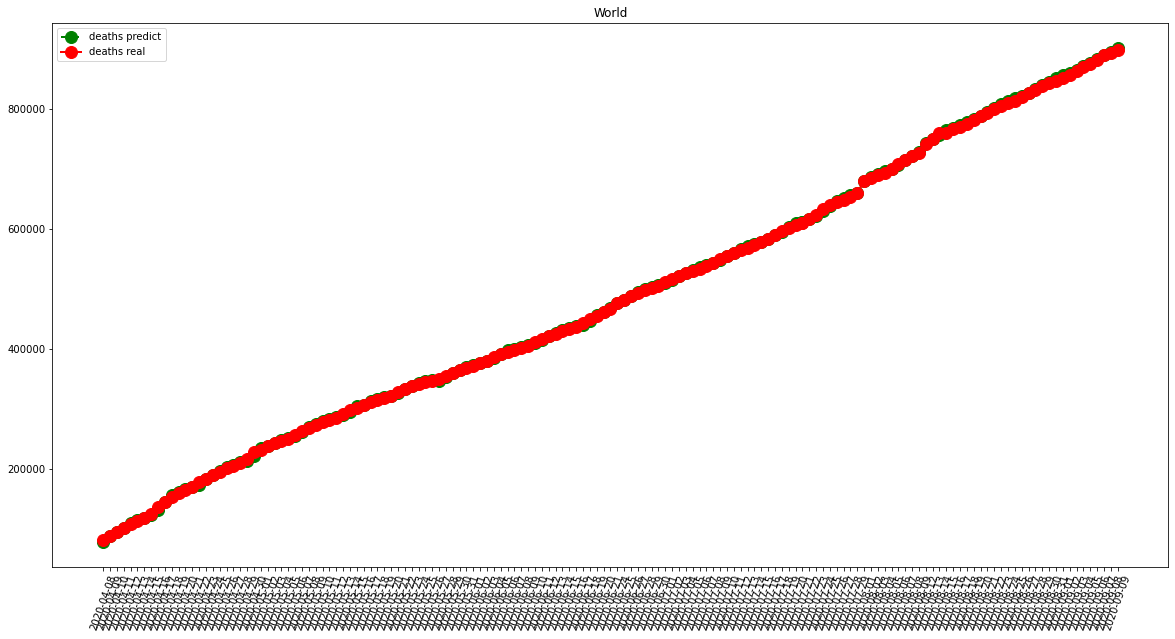

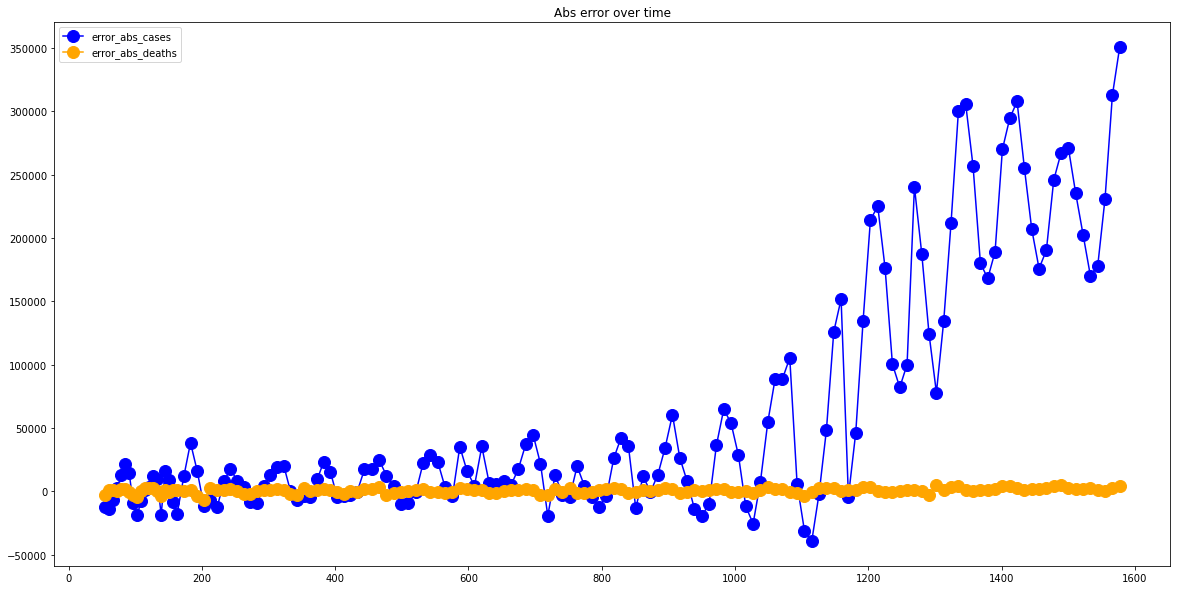

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1029.5875
RMSE =  1535.2066961813318
-- France performances for deaths --
MAE =  117.56875
RMSE =  265.2265658828316


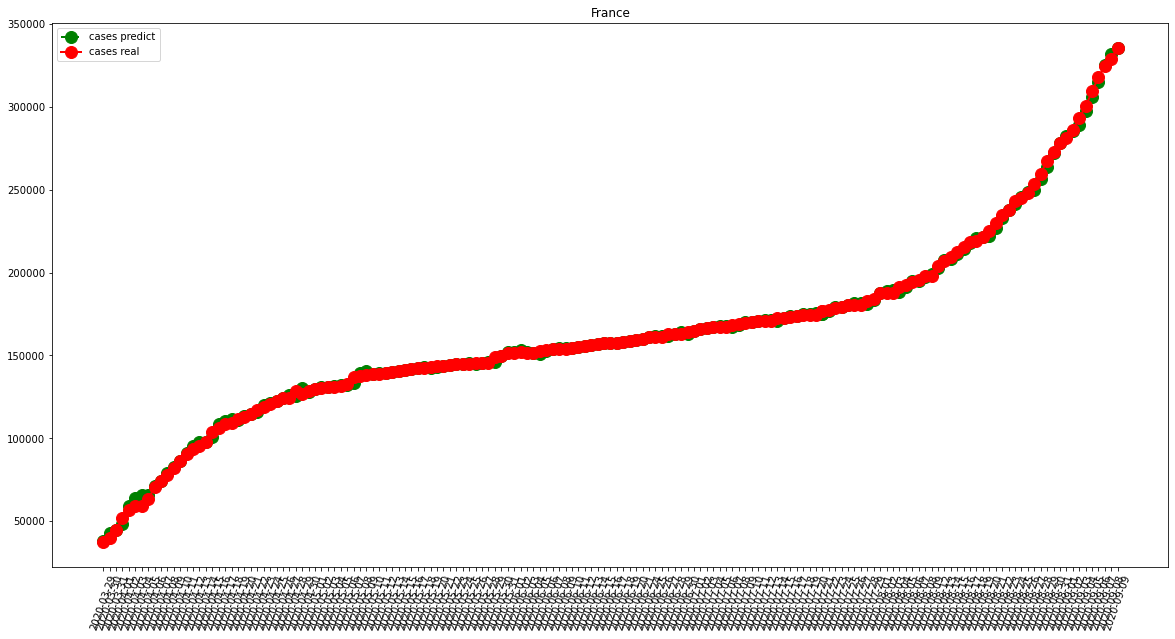

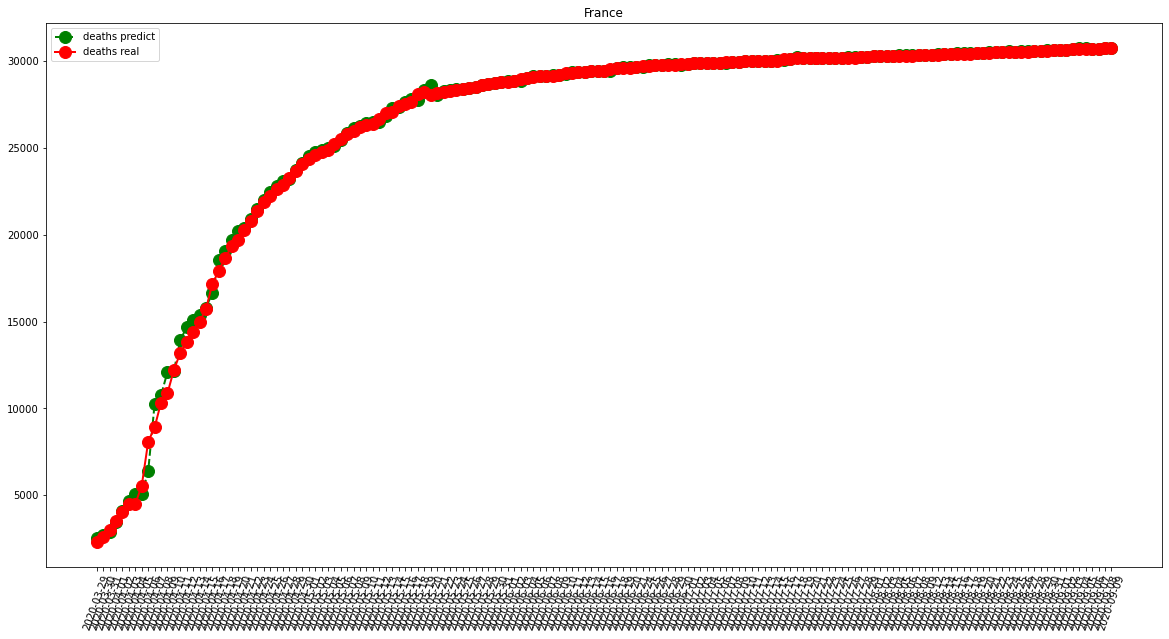

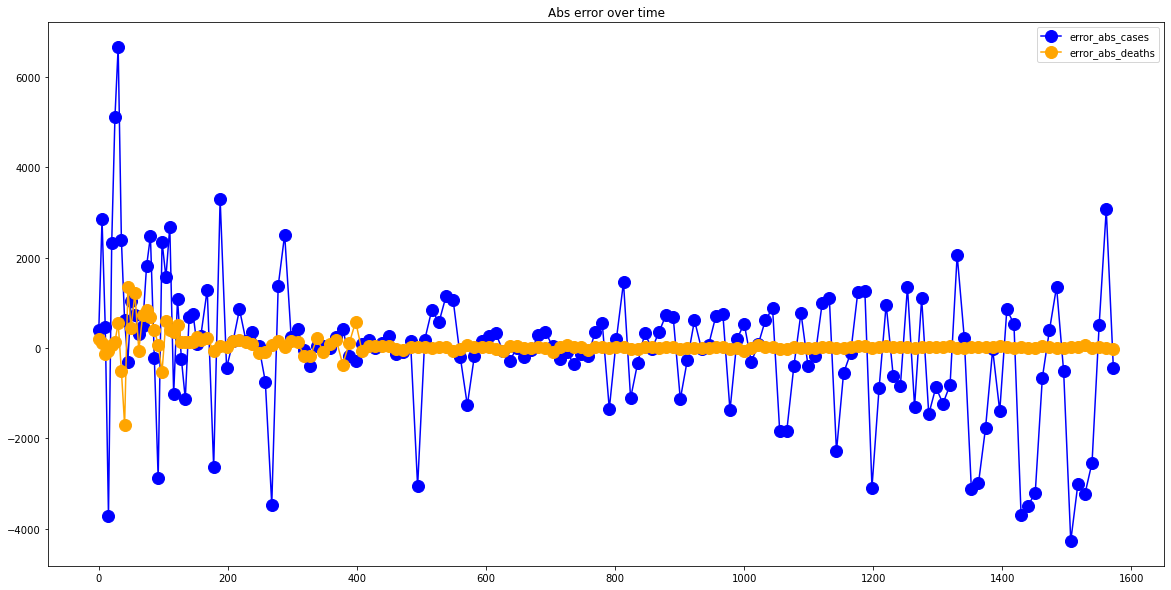

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  305.19375
RMSE =  452.305282690795
-- Italy performances for deaths --
MAE =  70.46875
RMSE =  234.71172478169896


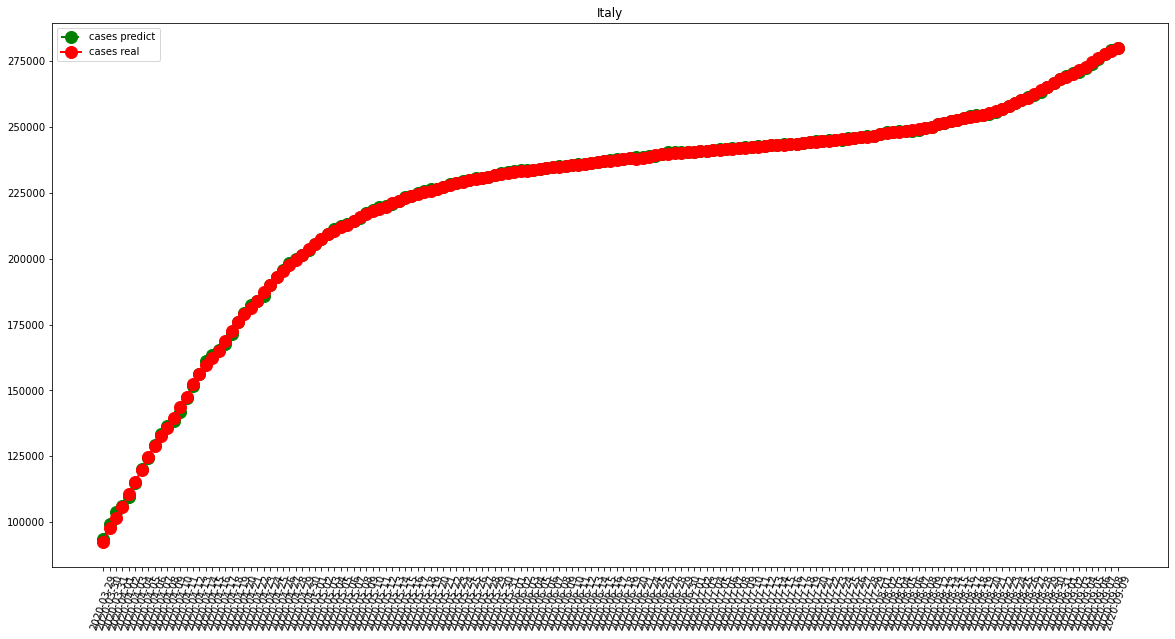

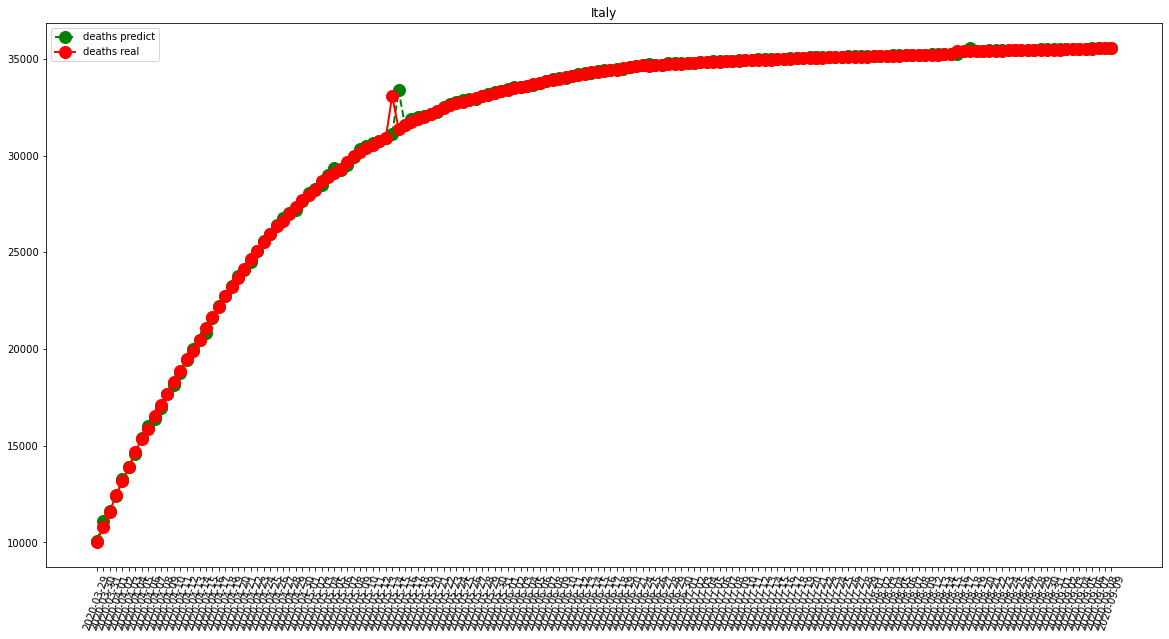

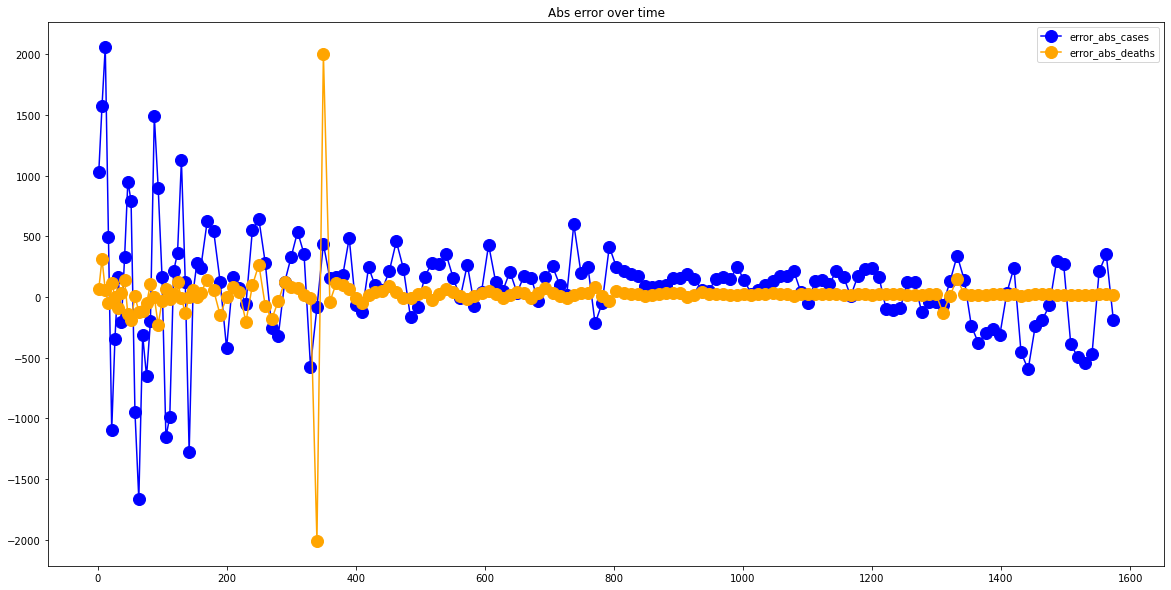

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2207.88125
RMSE =  4386.815027015614
-- Spain performances for deaths --
MAE =  123.65
RMSE =  321.82741881325154


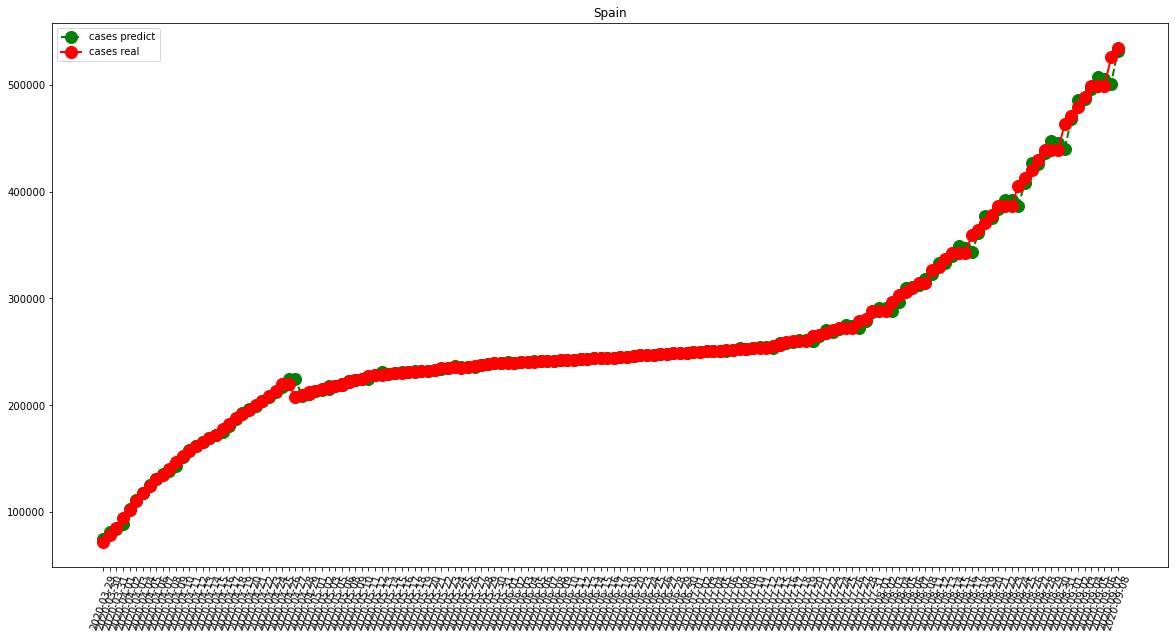

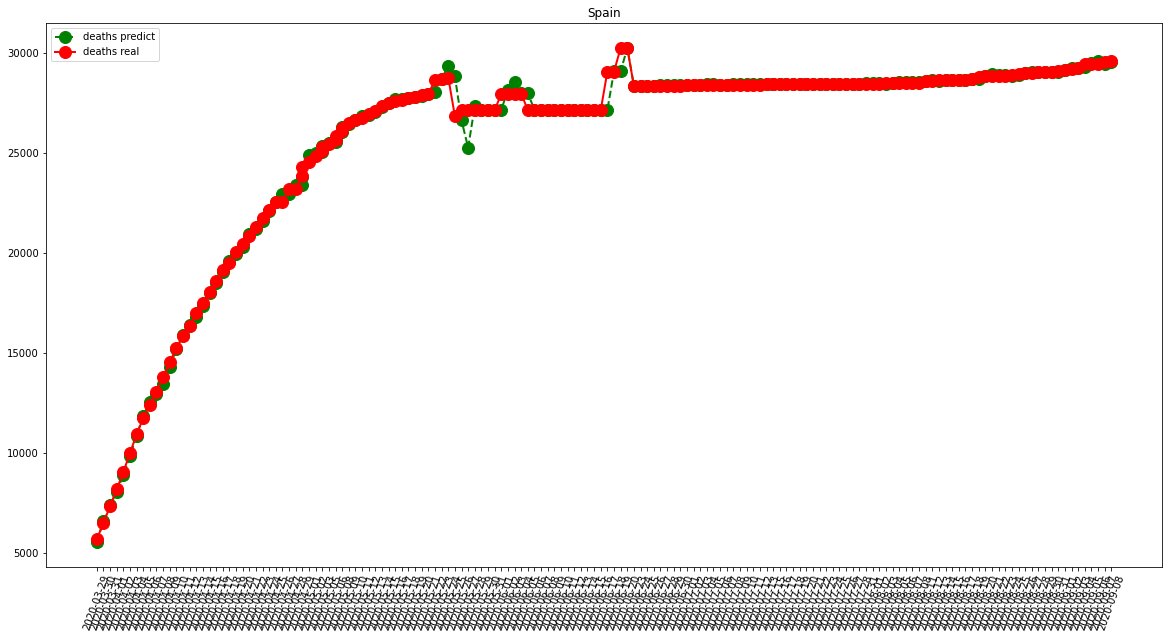

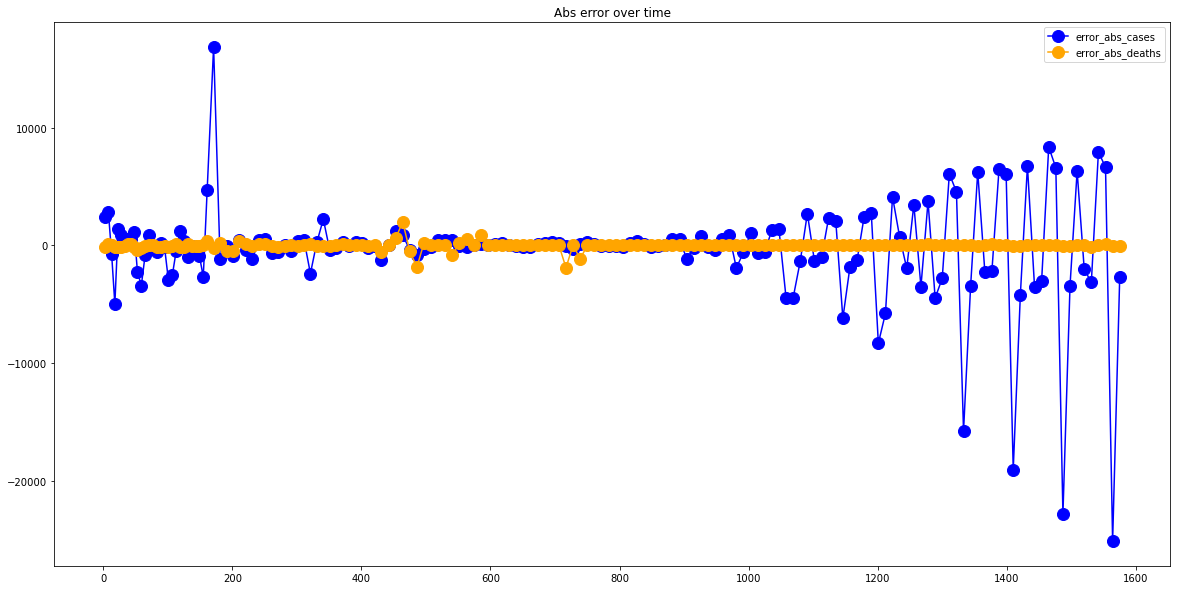

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  13823.6
RMSE =  21343.365553785094
-- United States performances for deaths --
MAE =  487.93125
RMSE =  685.0078238604286


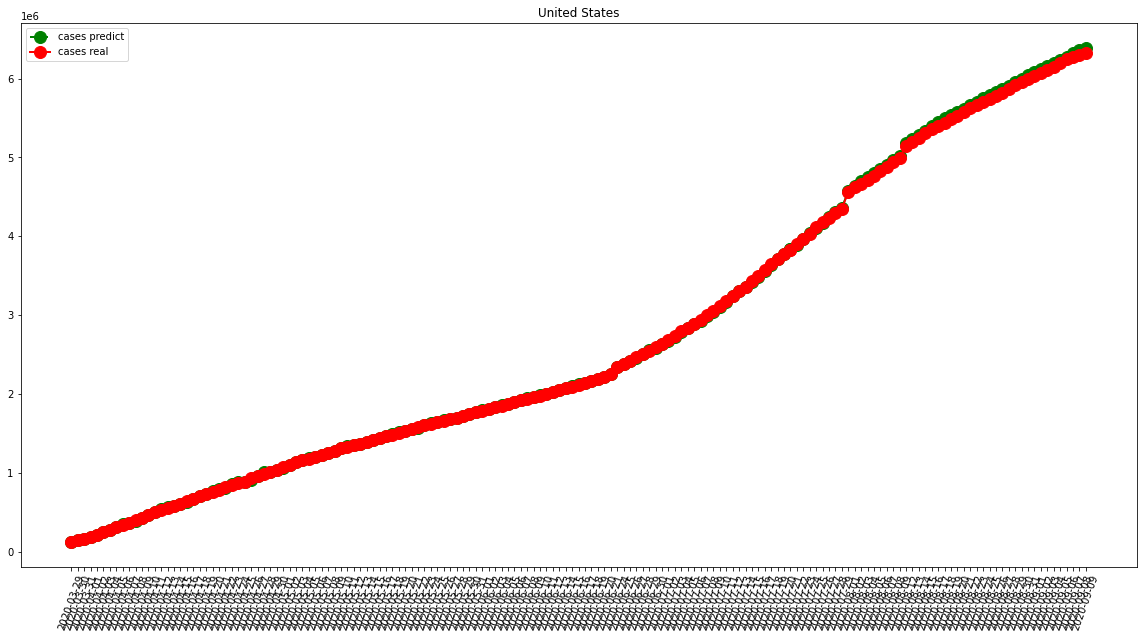

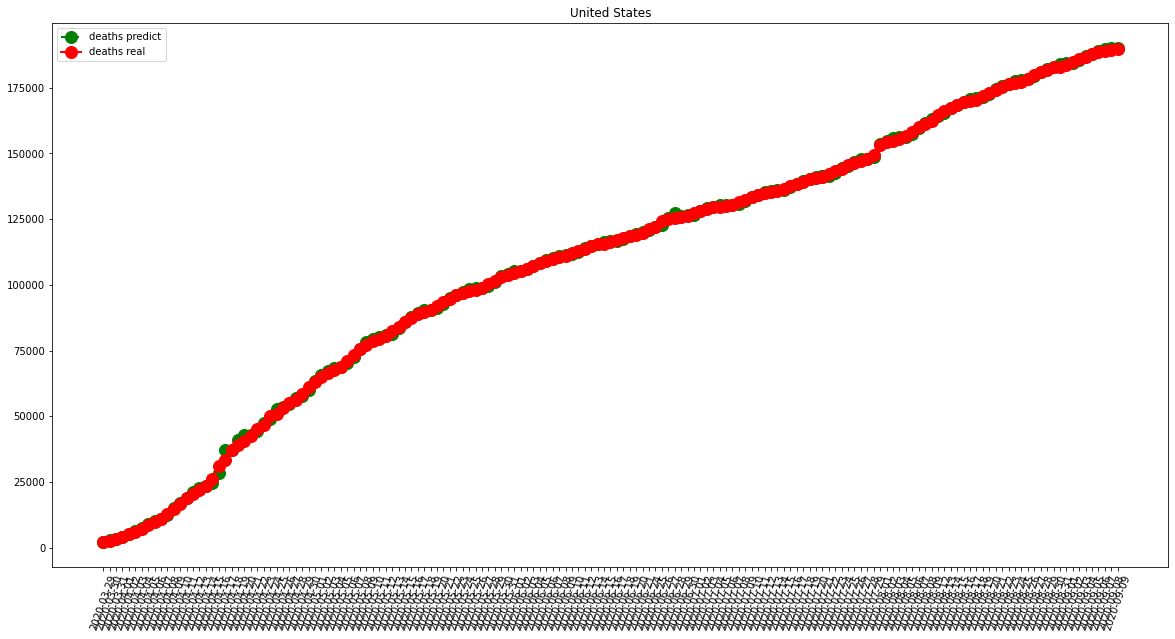

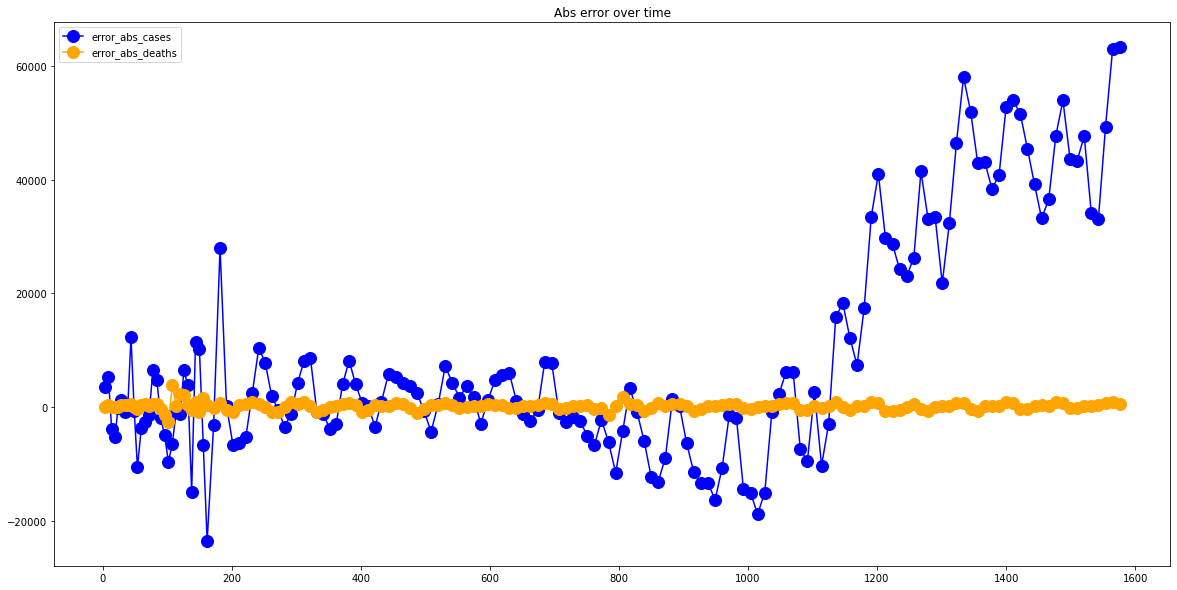

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  62.99375
RMSE =  94.36004848451489
-- China performances for deaths --
MAE =  26.30625
RMSE =  124.14389332544714


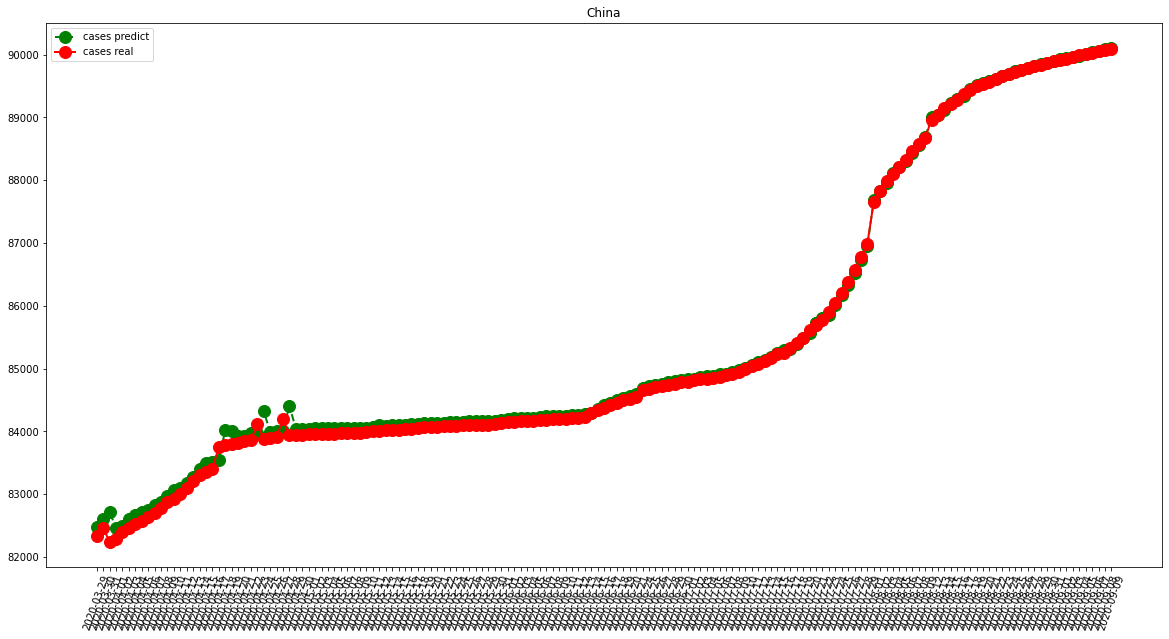

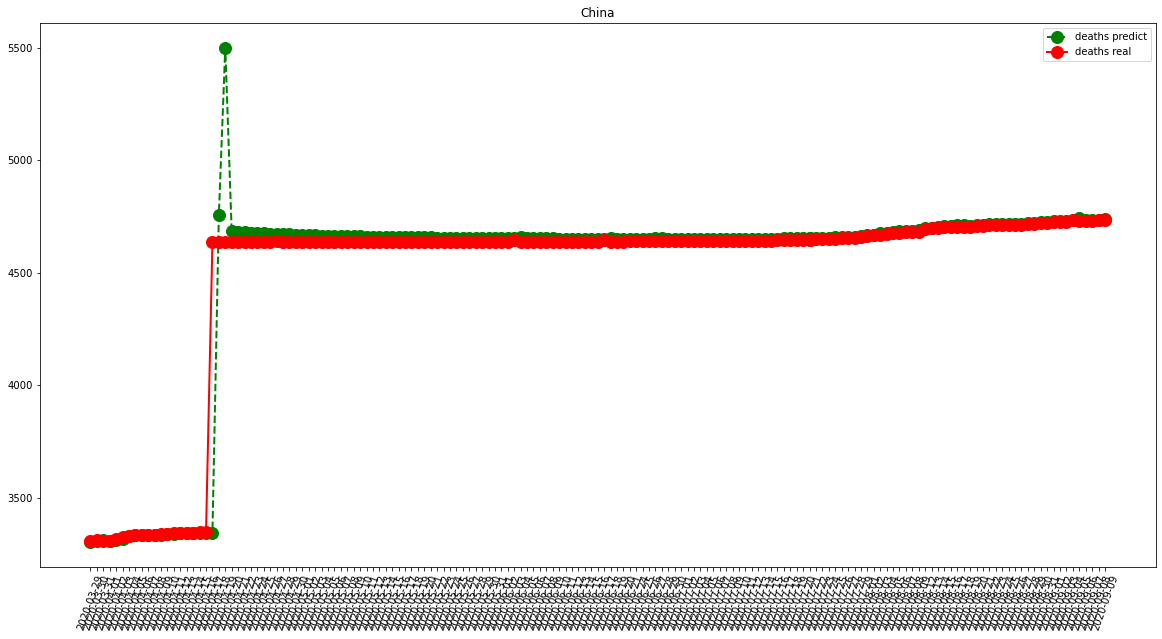

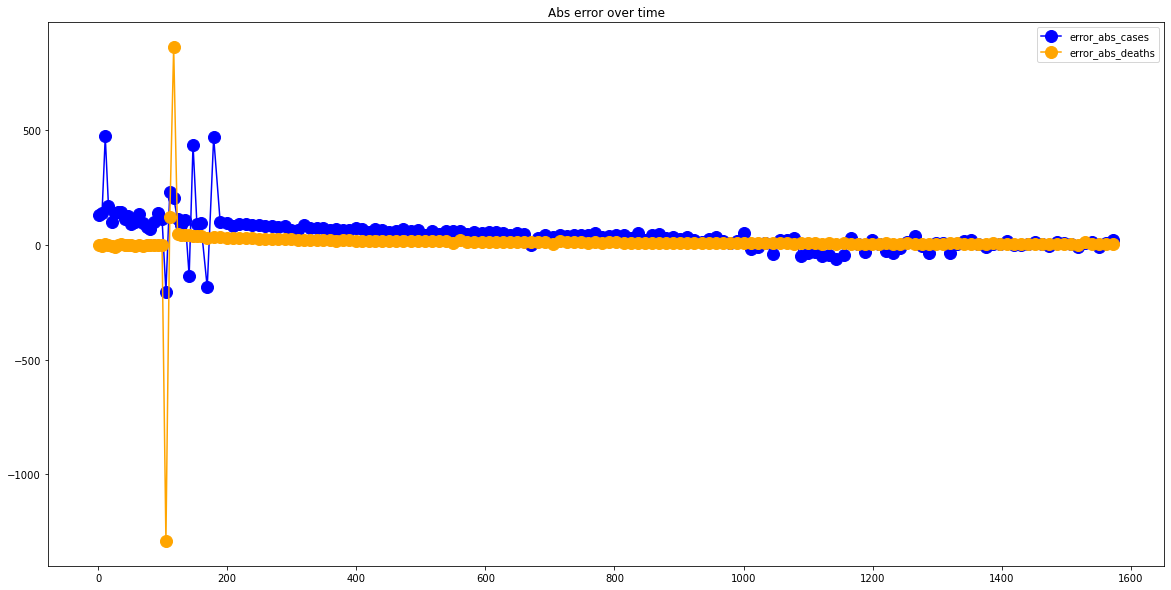

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1026.9772727272727
RMSE =  3643.5169791388
-- United Kingdom performances for deaths --
MAE =  230.9090909090909
RMSE =  742.8415345513102


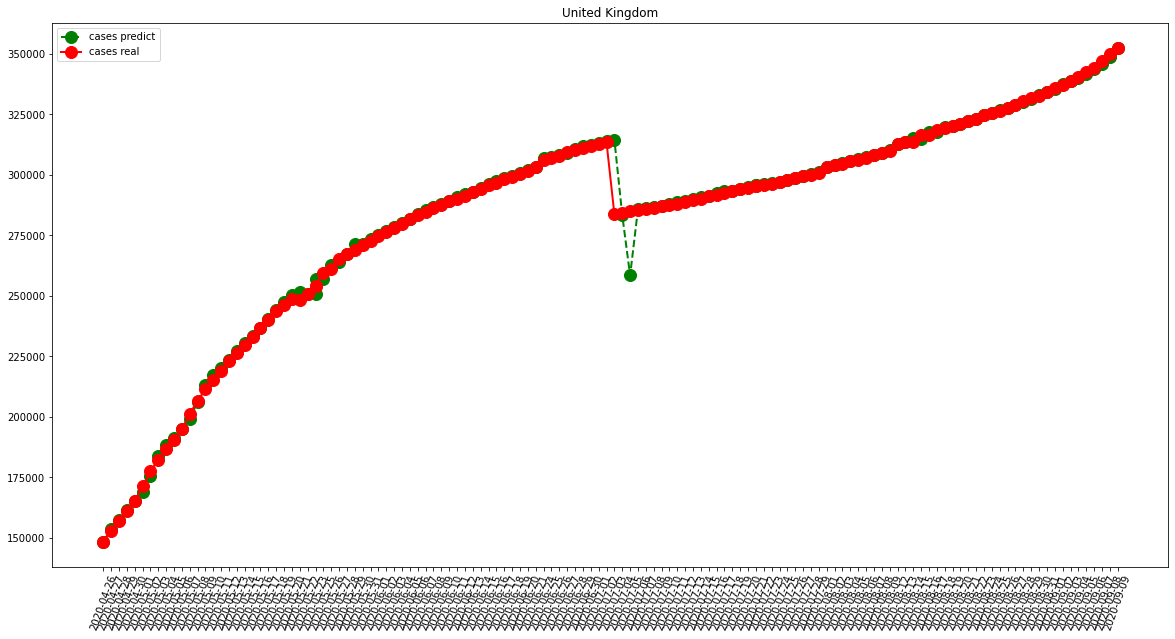

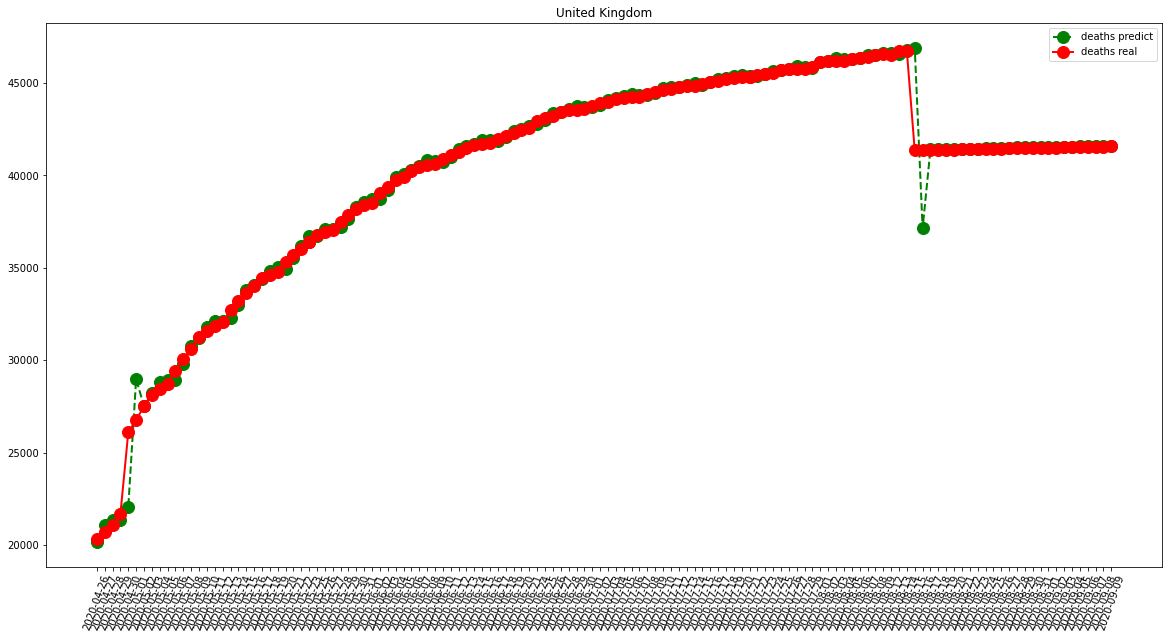

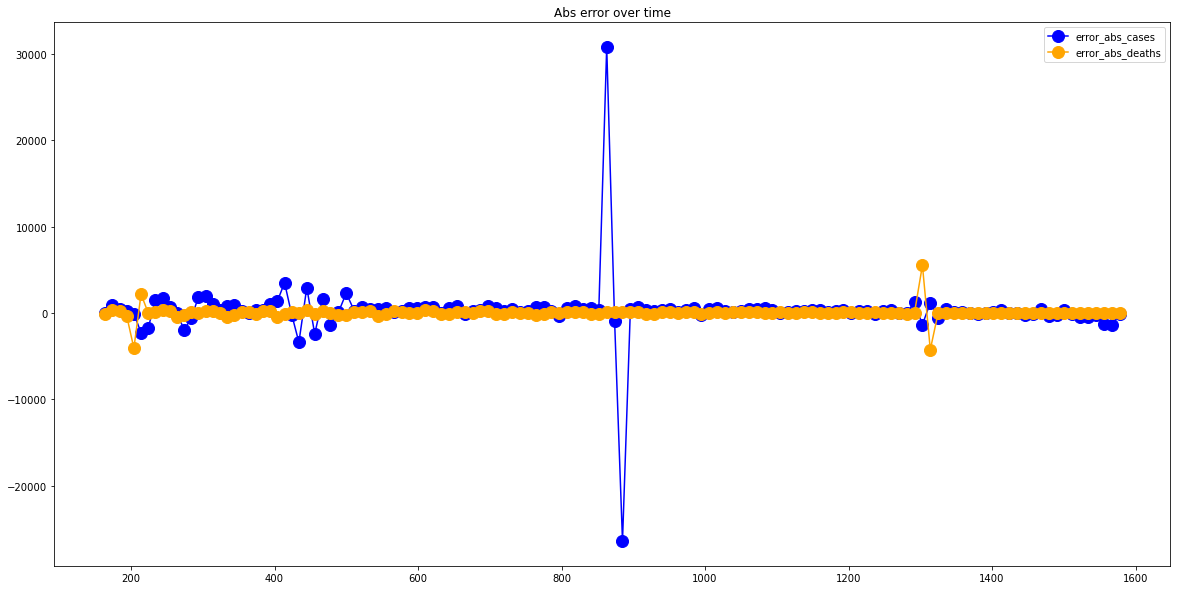

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  406.3636363636364
RMSE =  584.0938073268503
-- Germany performances for deaths --
MAE =  20.12121212121212
RMSE =  38.29767775221001


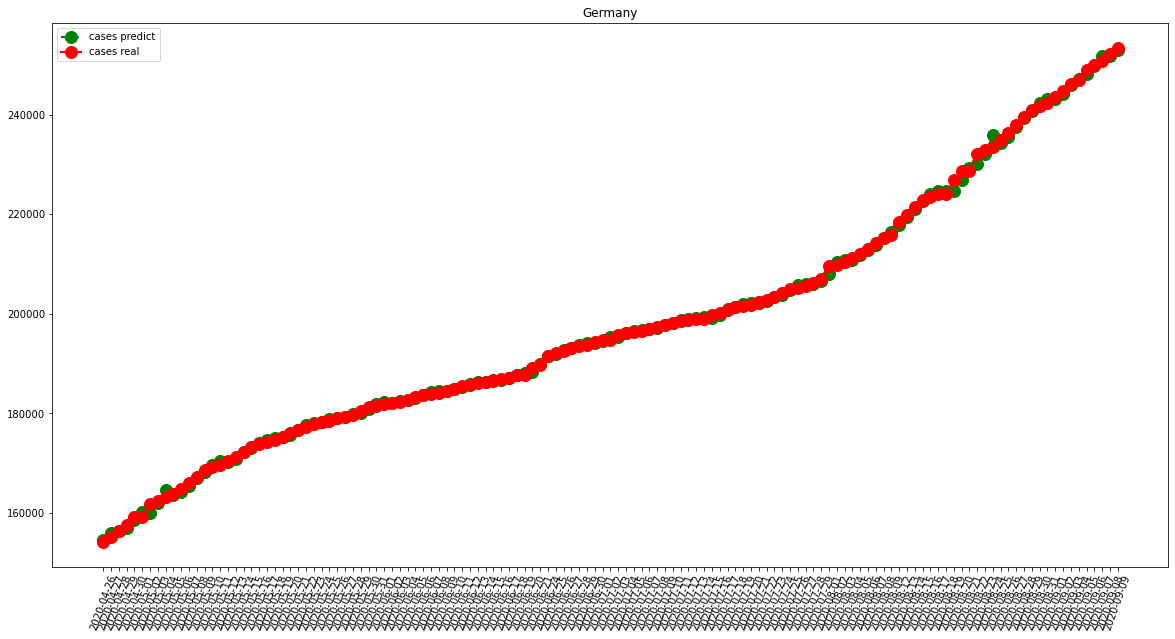

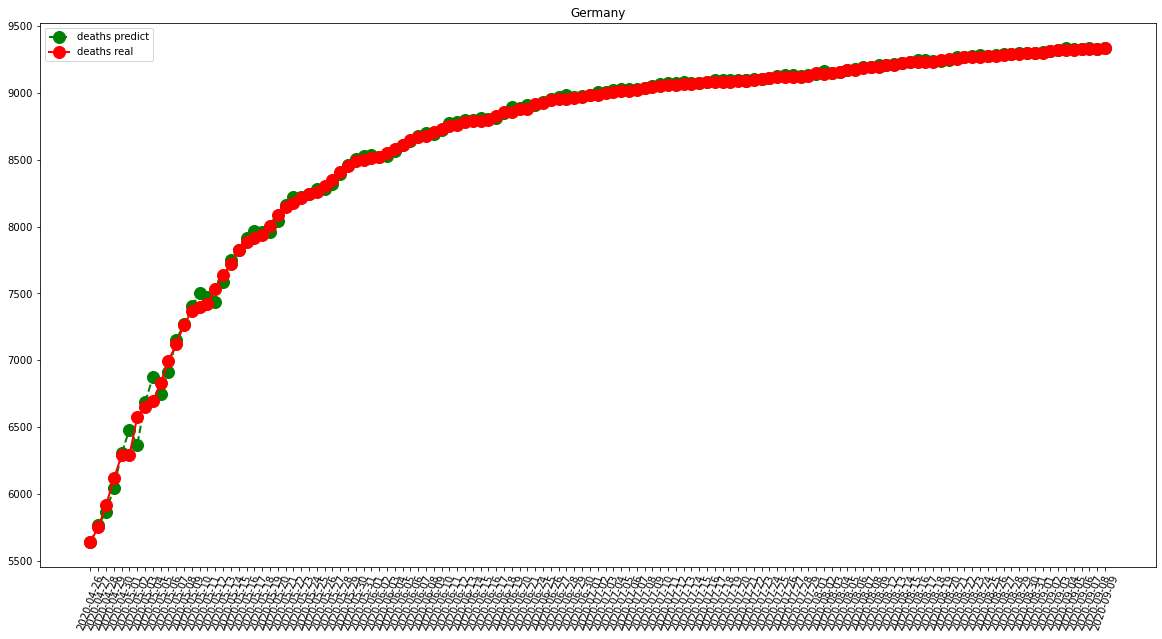

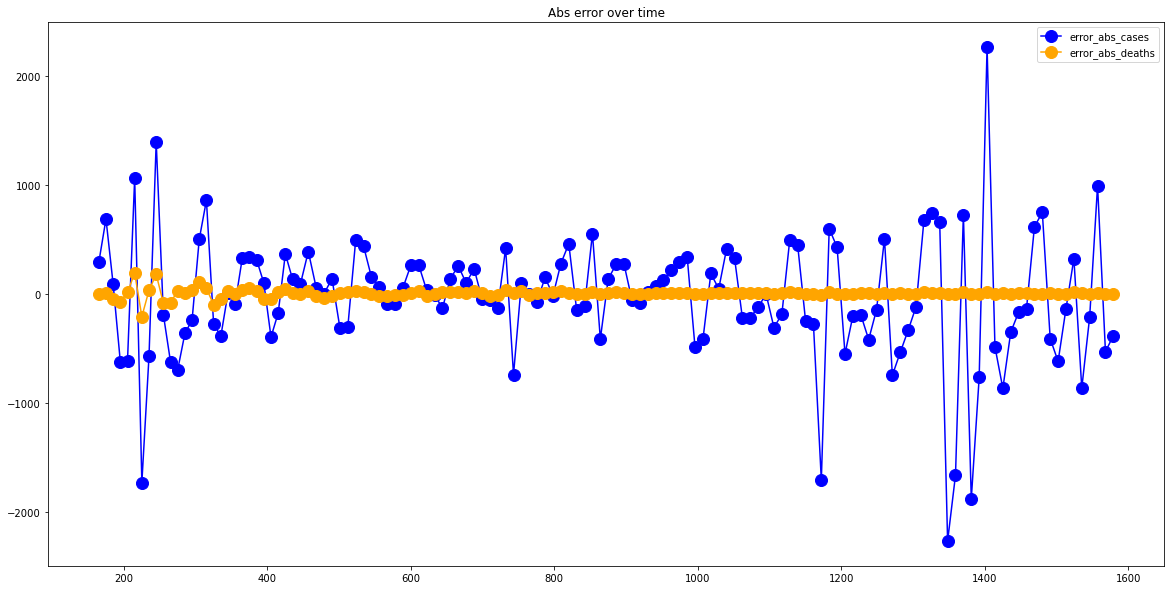

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  867.8560606060606
RMSE =  1240.057931809004
-- Iran performances for deaths --
MAE =  49.36363636363637
RMSE =  85.31083983843668


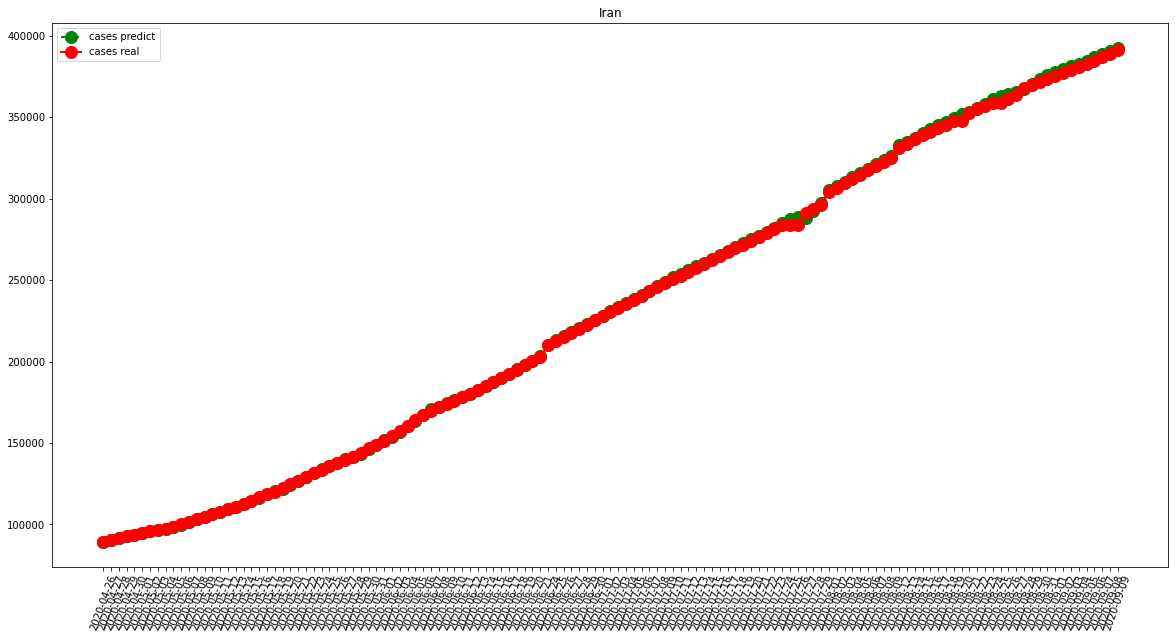

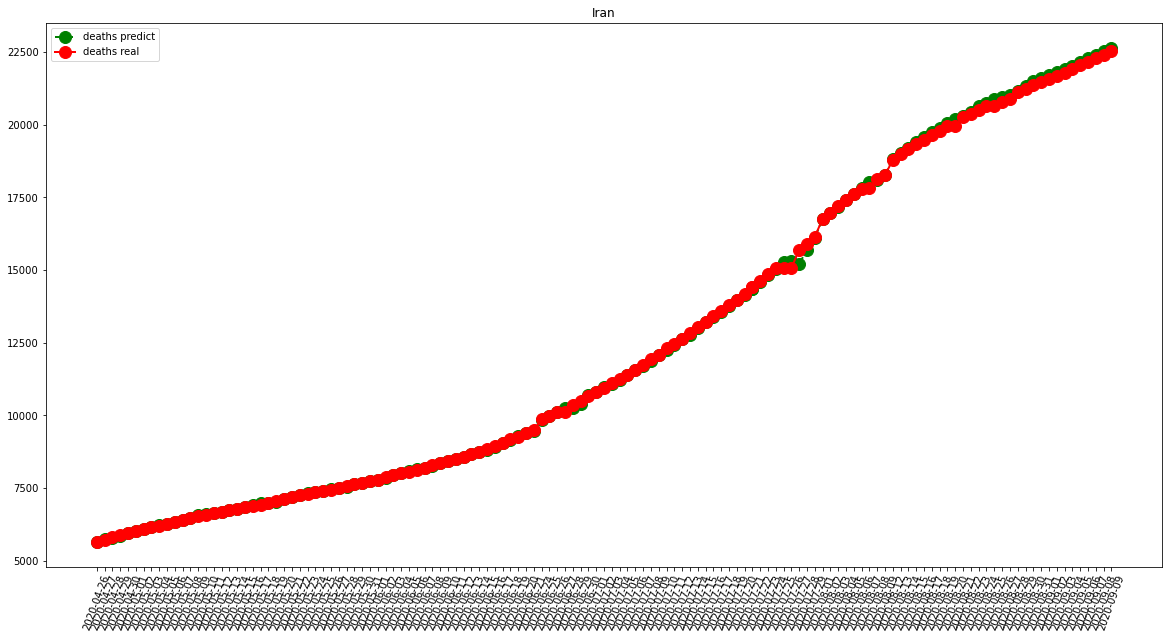

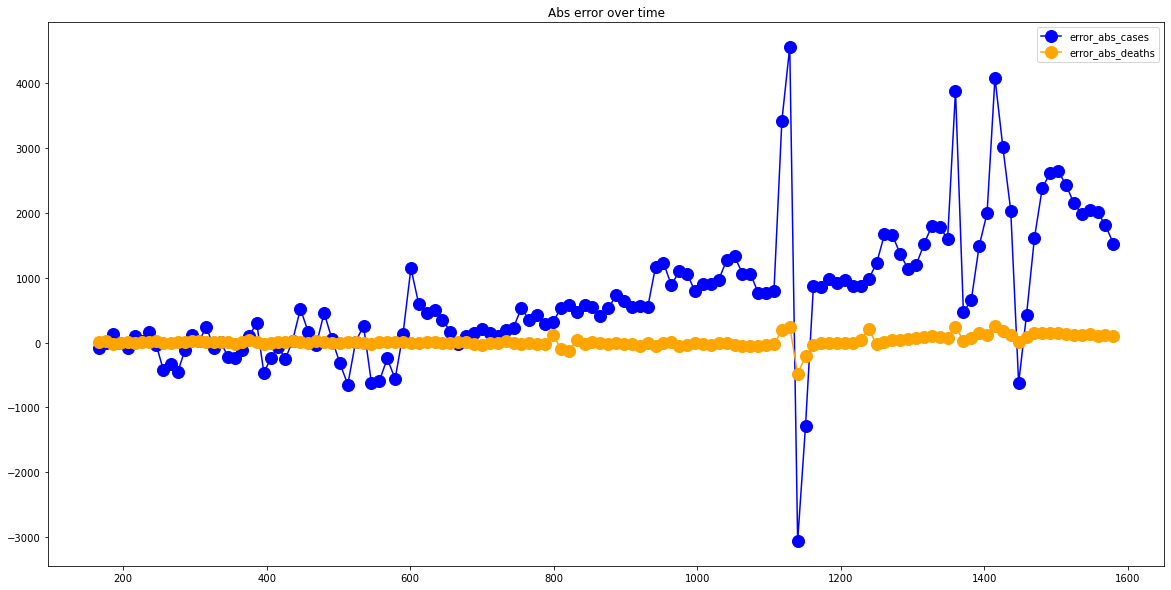

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  210.9090909090909
RMSE =  327.8034564500595
-- Turkey performances for deaths --
MAE =  16.106060606060606
RMSE =  88.46733689317034


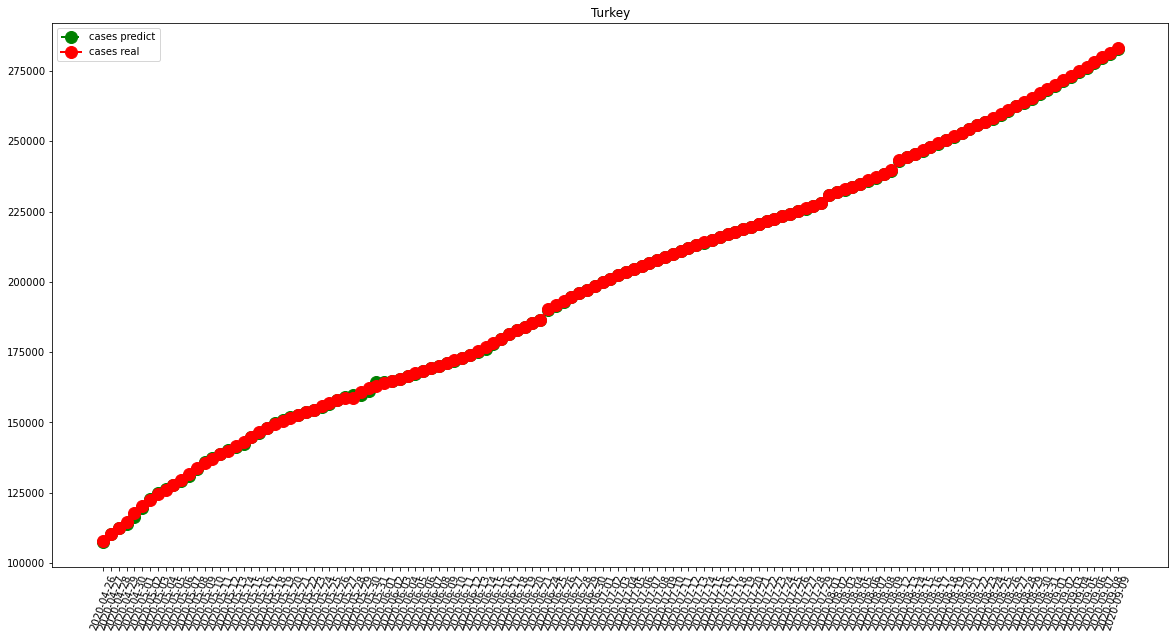

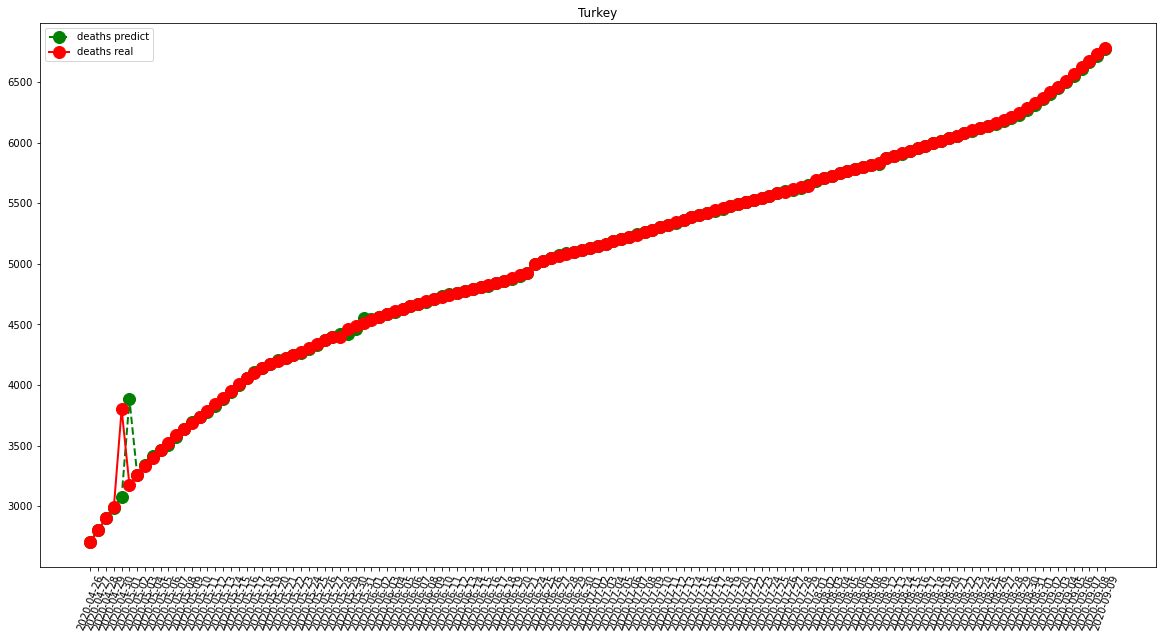

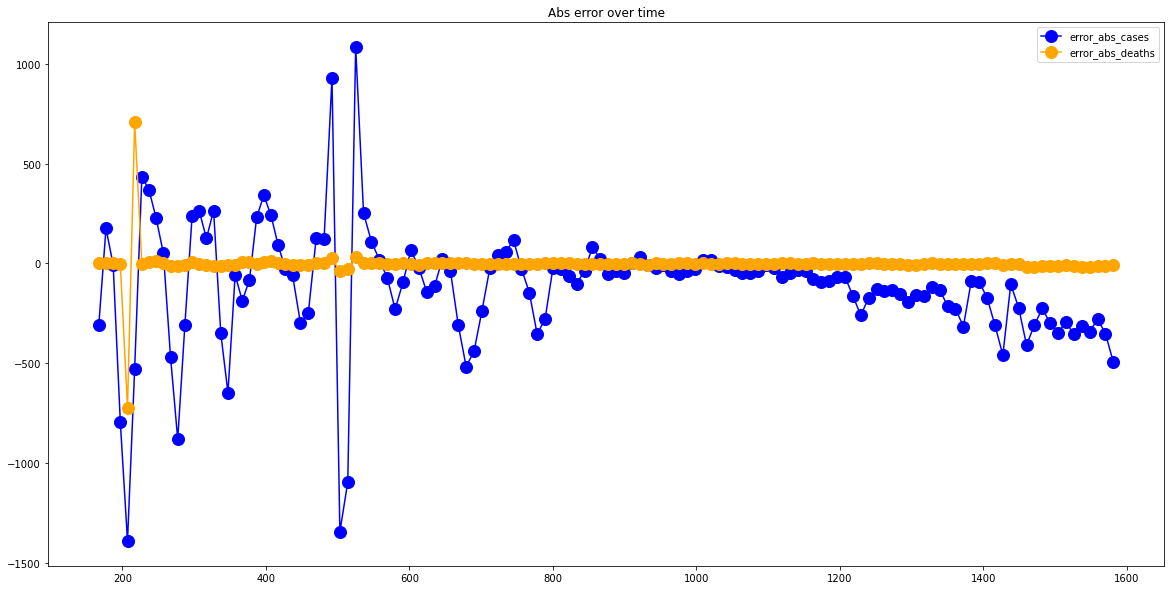

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  15276.780952380952
RMSE =  20547.72738540109
-- Brazil performances for deaths --
MAE =  466.0952380952381
RMSE =  573.2240316631801


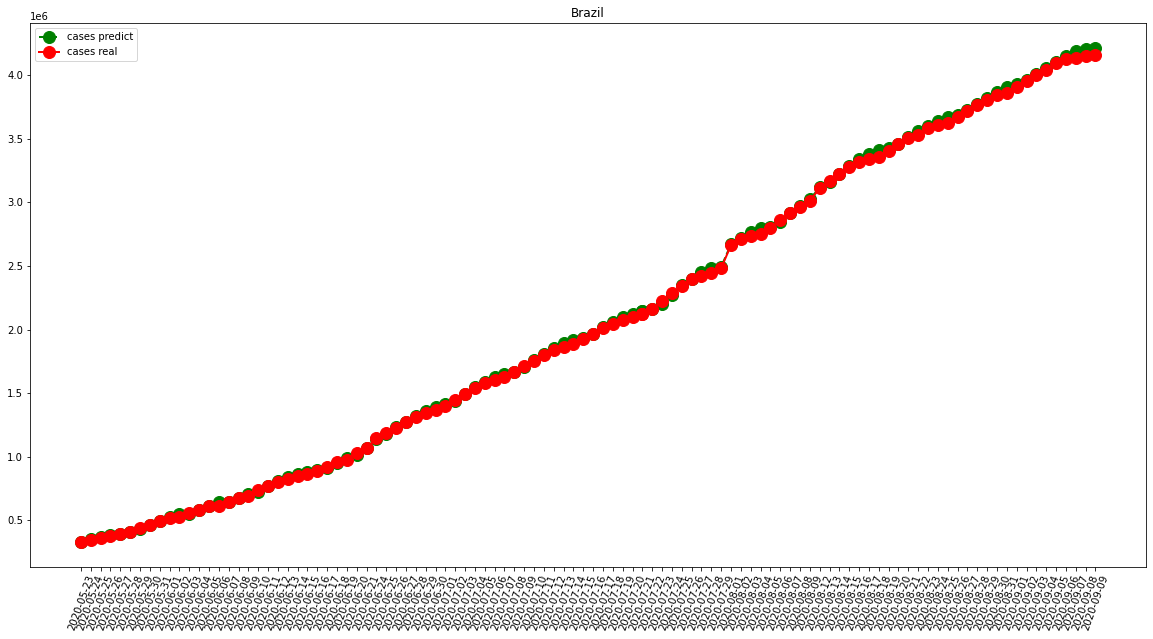

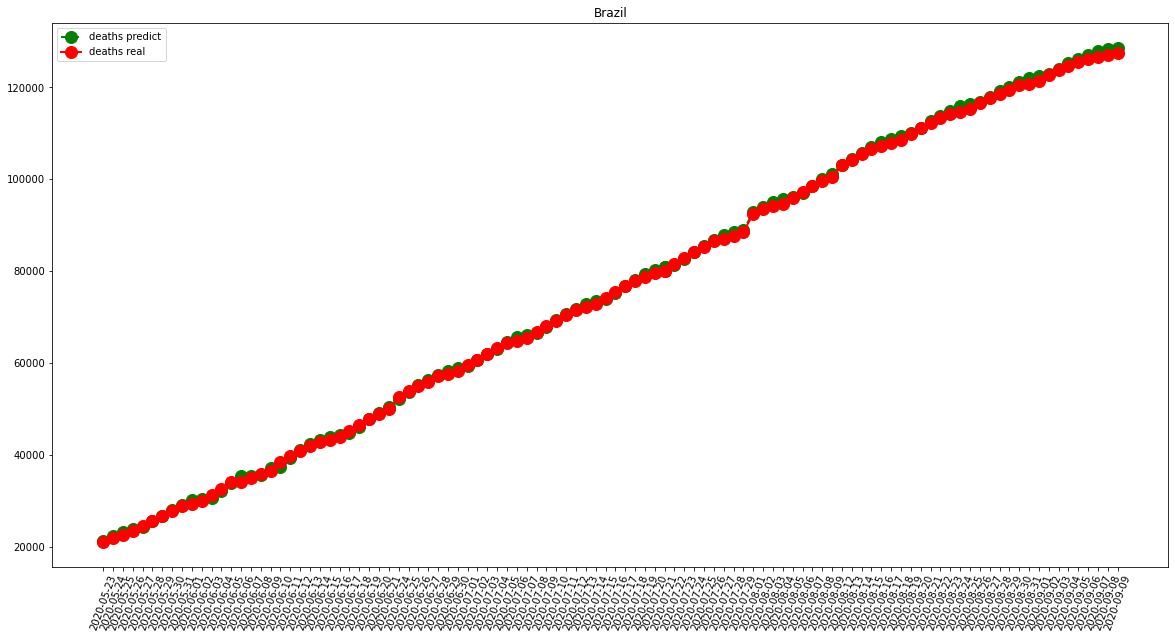

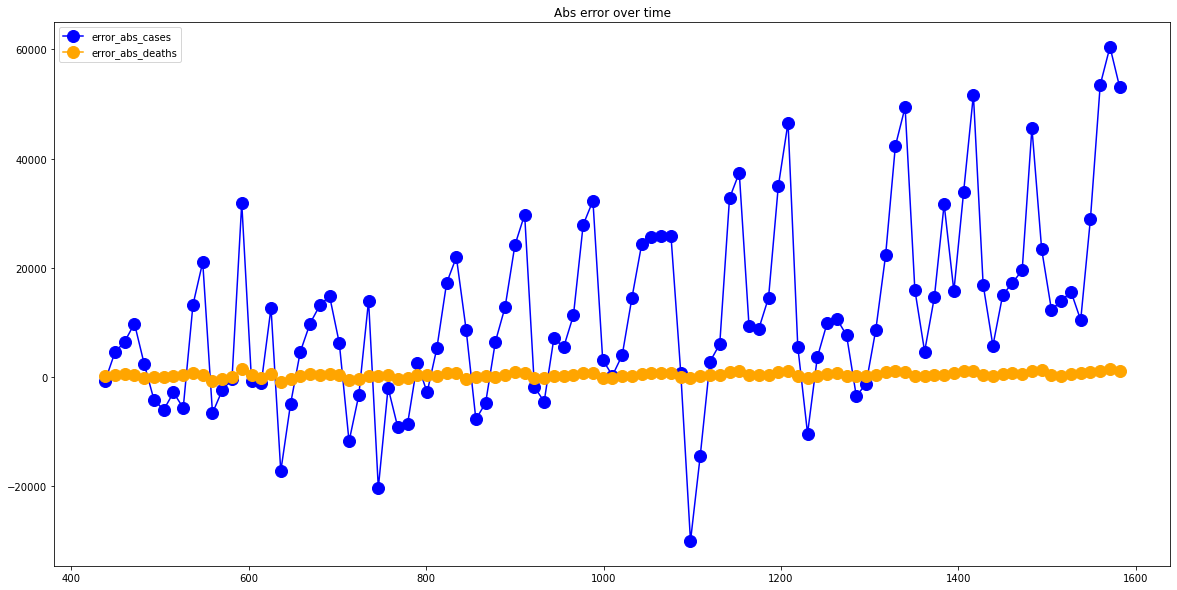

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)